In [1]:
# two

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 50,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 5
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\activations.py:14: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-Xi))
C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.8888888888888888, Loss: 0.45510521641484014
Checkpoint 200, Accuracy: 0.9135802469135802, Loss: 0.38427356437400534
Checkpoint 300, Accuracy: 0.9135802469135802, Loss: 0.34383385269730177
Checkpoint 400, Accuracy: 0.9135802469135802, Loss: 0.3145416047837999
Checkpoint 500, Accuracy: 0.9259259259259259, Loss: 0.2829940054151747


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 0. 1.] <-> [0.66934854 0.11726882 0.21338262]
[1. 0. 0.] <-> [0.84465516 0.04137173 0.11397313]
[1. 0. 0.] <-> [0.9629438  0.00728291 0.02977328]
[1. 0. 0.] <-> [0.93162006 0.02855801 0.03982191]
[1. 0. 0.] <-> [0.9504046  0.01859214 0.03100329]
[1. 0. 0.] <-> [0.91230273 0.05456858 0.03312874]
[1. 0. 0.] <-> [0.8851426  0.07676874 0.03808862]
[1. 0. 0.] <-> [0.9587741  0.01799999 0.02322593]
[1. 0. 0.] <-> [0.9444712  0.02708039 0.02844844]
[1. 0. 0.] <-> [0.960835   0.01461579 0.02454928]
[1. 0. 0.] <-> [0.8350912  0.11682954 0.0480793 ]
[1. 0. 0.] <-> [0.92748386 0.03951914 0.03299708]
[1. 0. 0.] <-> [0.90786684 0.01056823 0.08156496]
[1. 0. 0.] <-> [0.9563292  0.01764948 0.02602135]
[1. 0. 0.] <-> [0.8359097  0.11621802 0.04787226]
[0. 1. 0.] <-> [0.24370027 0.660877   0.09542274]
[0. 1. 0.] <-> [0.06453468 0.8831392  0.05232612]
[1. 0. 0.] <-> [0.8510959  0.08161692 0.06728717]
[0. 0. 1.] <-> [0.5282186  0.0018177  0.46996367]
[0. 1. 0.] <-> [0.13390918 0.79136246 0.07472838]


In [12]:
# Testing Performance

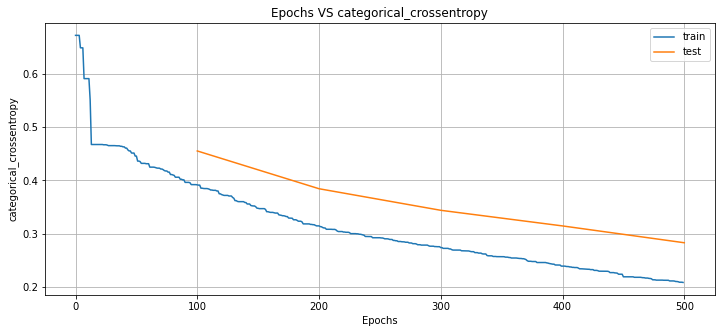

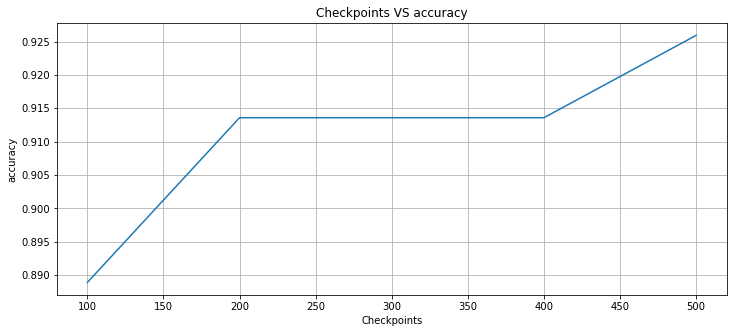

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8888888888888888, 'mean_square_error': 0.24651608674170766, 'categorical_crossentropy': 0.45510521641484014, 'precision': 0.8333333333333334, 'recall': 0.8333333333333334, 'f1': 0.8333333333333334, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 18, 'tn_hit': 14, 'fn_hit': 0}, 1: {'tp_hit': 10, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 7}, 2: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 11}}, 'checkpoint': 100} 


{'accuracy': 0.9135802469135802, 'mean_square_error': 0.2011770048007372, 'categorical_crossentropy': 0.38427356437400534, 'precision': 0.8703703703703703, 'recall': 0.8703703703703703, 'f1': 0.8703703703703703, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 14, 'tn_hit': 18, 'fn_hit': 0}, 1: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 91, 'fn_hit': 6}, 2: {'tp_hit': 7, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 8}}, 'checkpoint': 200} 


{'accuracy': 0.9135802469135802, 'mean_square_error': 0.17722924882539745, 'categorical_crossentropy': 0.34383385269730177, 'preci

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[ 0.15883687  0.93758917  1.012044   -3.          2.6833813 ]
 bias: 1.2130553722381592

Neuron 1: weights:
[-1.024721    2.0458956   1.1198334  -2.2171109  -0.11114912]
 bias: 2.111095666885376

Neuron 2: weights:
[-0.04520394  2.8914852   0.36159754  2.072853   -2.8294604 ]
 bias: -0.6219455599784851

Neuron 3: weights:
[ 2.0994725  -2.4082649  -1.6322676  -2.1546125   0.19448131]
 bias: 1.7315125465393066

$
Layer 2
Neuron 0: weights:
[-2.6621766  1.9964572 -0.5572767  2.475965 ]
 bias: -1.5629240274429321

Neuron 1: weights:
[ 1.9603686  1.155805  -1.2648529 -2.87331  ]
 bias: -2.0025827884674072

Neuron 2: weights:
[-0.97213125 -2.9991734  -0.76672477 -0.98574394]
 bias: 1.7491296529769897

$

